### Random Walk Generation

In [1]:
# used during development to releoad modules every time there is a change
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from risk_kit import Metrics, pre_processing_ind, get_ind30_nfirms, get_ind30_size, plot_ef2
pd.options.display.float_format = '{:.6f}'.format

In [2]:
def gbm0(n_years=10, n_scenarios = 1000, mu= 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100):
    """
    Less Efficient impementation of GBM
    Evolution of an Asset Price using Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # from return to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [22]:
def gbm(n_years=10, n_scenarios = 1000, mu= 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100):
    """
    More efficient version of GBM
    Evolution of an Asset Price using Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=1+ mu*dt, scale=sigma*np.sqrt(dt) ,size = (n_steps, n_scenarios))
    rets_plus_1[0] = 1
    # from return to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [3]:
p = gbm0(10, n_scenarios=3)
p.shape

(120, 3)

In [4]:
p.head()

,0,1,2
0,101.097086,105.045174,100.749840
1,105.489116,102.948912,104.937308
2,106.837300,113.113090,105.993905
3,99.459064,108.735813,101.158786
4,98.270050,103.745063,98.667947


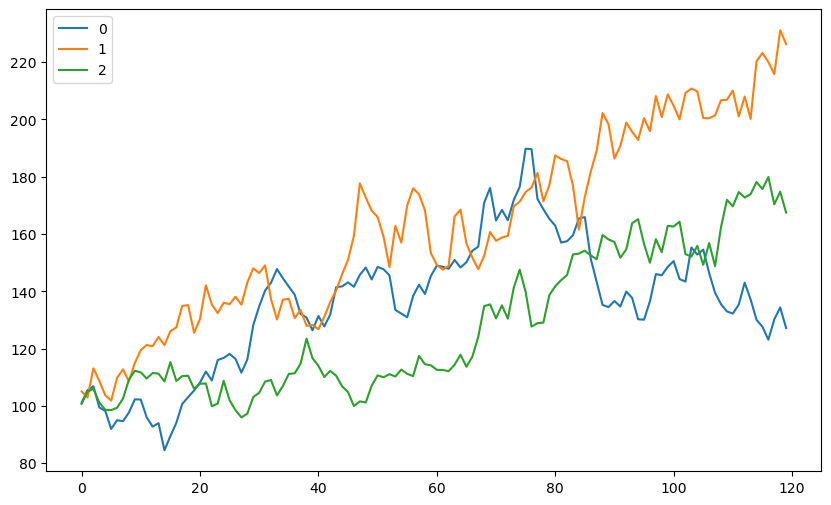

In [5]:
p.plot();

In [6]:
gbm0(n_years=10, n_scenarios=1000)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.718424,98.534179,99.209840,97.603839,93.605808,96.327040,100.459694,97.051172,104.552947,93.862836,...,93.300403,93.097200,101.337425,100.750479,101.186818,98.070200,98.423187,101.734279,110.163199,99.635252
1,109.024324,102.935145,98.118603,94.357954,97.782303,96.033133,104.997415,98.640449,106.960397,97.604131,...,96.925144,94.240902,108.878070,102.095750,107.734273,101.553380,95.729928,108.732811,102.836046,104.669171
2,116.291020,111.622308,98.864405,86.902447,93.105587,99.421877,101.158721,103.819185,109.721115,98.282213,...,98.924835,97.559153,112.165156,99.653506,110.779368,108.594452,93.237157,105.289507,110.630231,95.911379
3,119.150120,120.443244,100.284604,87.702483,88.686322,96.914707,96.551793,106.741633,112.275973,104.791149,...,102.088784,96.107536,115.751399,104.221895,109.188183,114.240152,91.741020,107.744194,119.893999,96.231748
4,122.470323,126.362289,101.061934,94.037908,93.434636,100.179690,92.225639,101.230817,116.421466,108.042227,...,96.084332,96.977704,108.917187,94.616986,117.464243,126.499242,90.802020,108.687852,119.675801,97.418240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,83.973719,454.094195,153.908989,138.946393,154.147046,180.642097,109.624082,413.369826,438.076328,103.334988,...,125.046800,162.770019,89.400860,175.298932,212.888447,239.419017,185.715631,238.883462,197.253316,115.947958
116,81.555820,474.629959,160.700374,139.907298,154.113865,196.653645,106.744935,413.305596,387.476649,111.565635,...,122.997473,165.926797,85.348137,172.064721,208.861938,248.896449,186.420106,259.132389,177.381333,115.079677
117,77.105126,478.398313,155.938393,140.563943,153.354747,193.013384,110.551452,420.327306,421.382768,112.500088,...,128.305674,167.122110,84.070121,167.303887,210.811229,258.001502,186.329864,273.416501,189.048192,113.223174
118,74.728421,457.388348,156.676016,145.655712,153.183889,185.439033,105.151949,414.280134,412.943871,108.596890,...,139.621382,172.712831,84.910566,155.900607,225.453027,267.336478,183.726657,261.816322,185.957880,119.015175


In [7]:
%timeit gbm0(n_years=5, n_scenarios=1000)

2.05 ms ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit gbm(n_years=5, n_scenarios=1000)

1.94 ms ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [29]:
gbm(n_years=10, n_scenarios=20).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.339728,104.931102,101.329237,101.244791,104.068738,103.032042,96.875743,101.498182,96.638663,102.488944,101.554304,101.505636,103.903923,92.262744,106.511020,98.628353,99.227655,96.687856,98.235229,98.608004
2,101.942065,102.441840,100.637400,101.112795,107.980669,110.290433,104.689633,99.195499,102.492277,110.327674,105.889118,108.151602,100.068932,95.083427,104.679491,103.632371,95.226367,94.364646,99.598093,92.956172
3,99.786834,107.132571,95.959733,102.129118,113.454124,108.240994,105.485805,100.458063,99.841346,108.633680,104.816742,106.392882,91.969350,93.577308,101.760266,105.746946,93.786895,98.478611,101.241695,91.172777
4,104.134030,113.797254,95.584060,102.669661,99.653448,115.881410,106.081128,95.892334,97.460124,102.530621,98.758722,113.168035,94.729427,89.354478,105.172518,110.965244,92.259761,97.659313,98.797311,86.525773


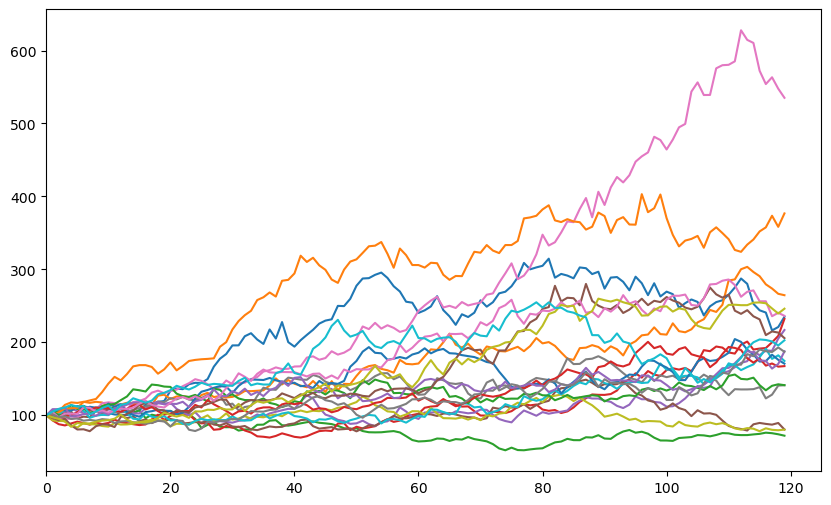

In [28]:
gbm(n_years=10, n_scenarios=20).plot(xlim=0,legend=False);